In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../uscode')

import matplotlib.pyplot as plt
import itertools
import random
import numpy as np

In [35]:
import util
from uscode import USCode
from citation_network import CitationNetwork
from cluster import *

In [43]:
usc = USCode.from_json('../data/usc20191009.json')
print(len(usc.titles))

cn = CitationNetwork(usc)
print(len(cn.nodes))

53
64165


In [63]:
t = 't17'
sections = list(usc.titles[t].iter_sections())

clusterings = {}
clusterings['vec'] = Clustering(sections, vectorization_distance)
clusterings['cite'] = Clustering(sections, citation_distance)
clusterings['uw-cite'] = Clustering(sections, unweighted_citation_distance)
clusterings['sink'] = Clustering(sections, CitationSinks(sections, cn).distance)

In [64]:
def plot(clustering):
    plt.figure(figsize=(40, 15))
    clustering.plot_dendrogram()
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)

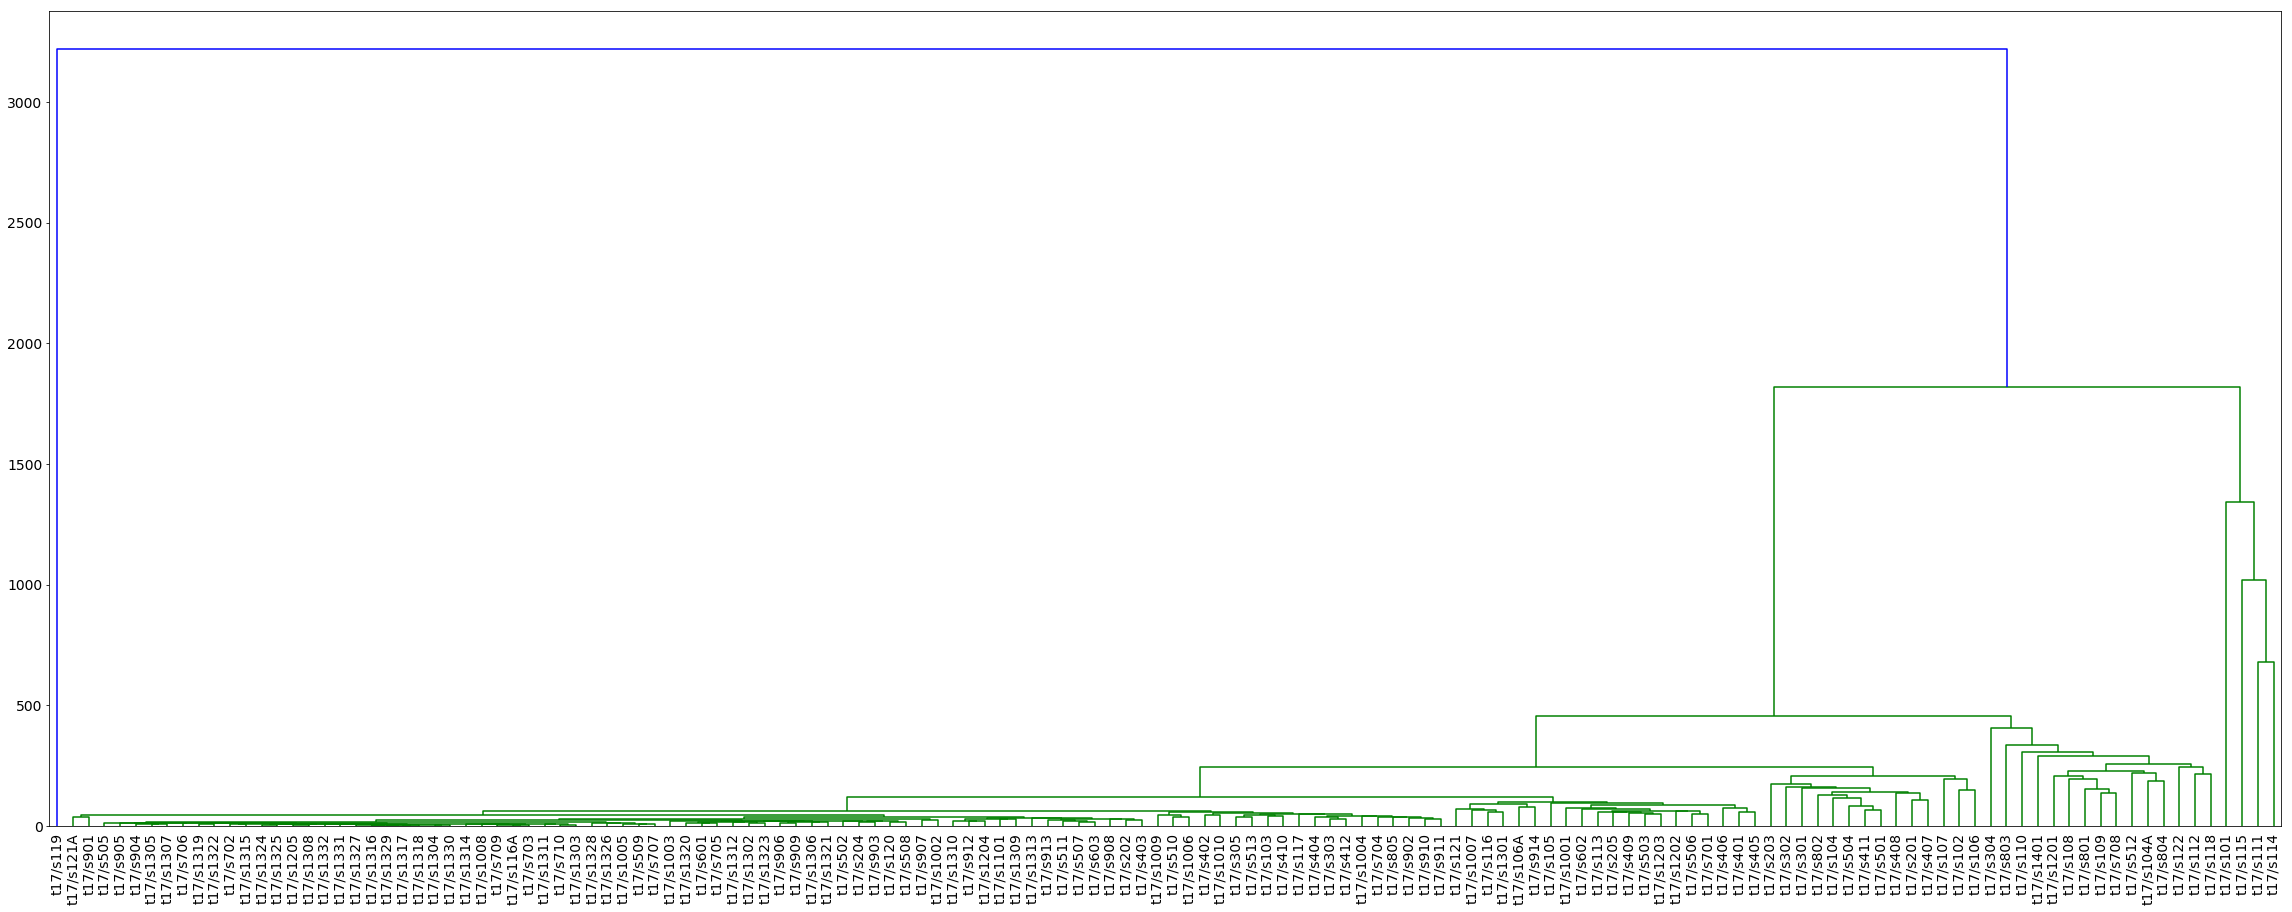

In [65]:
plot(clusterings['vec'])
# plt.yscale('symlog')

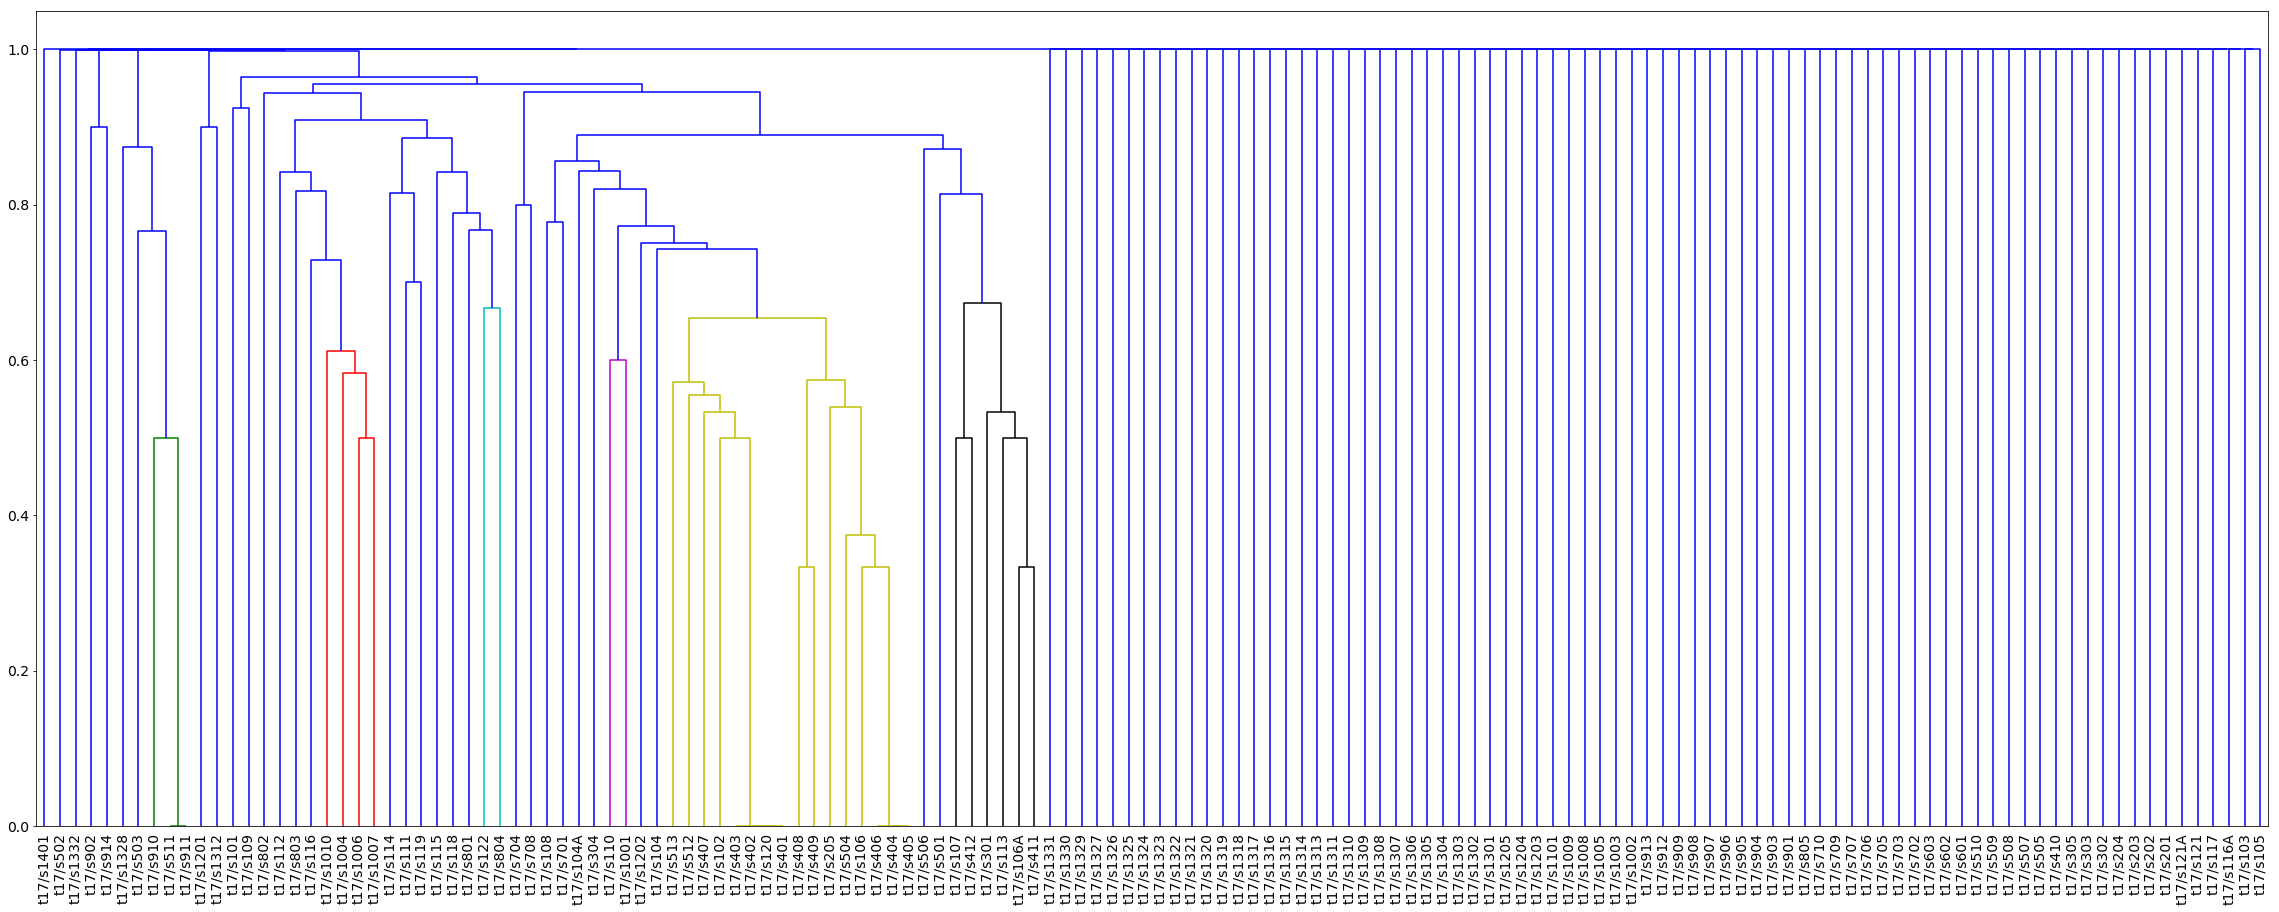

In [66]:
plot(clusterings['cite'])

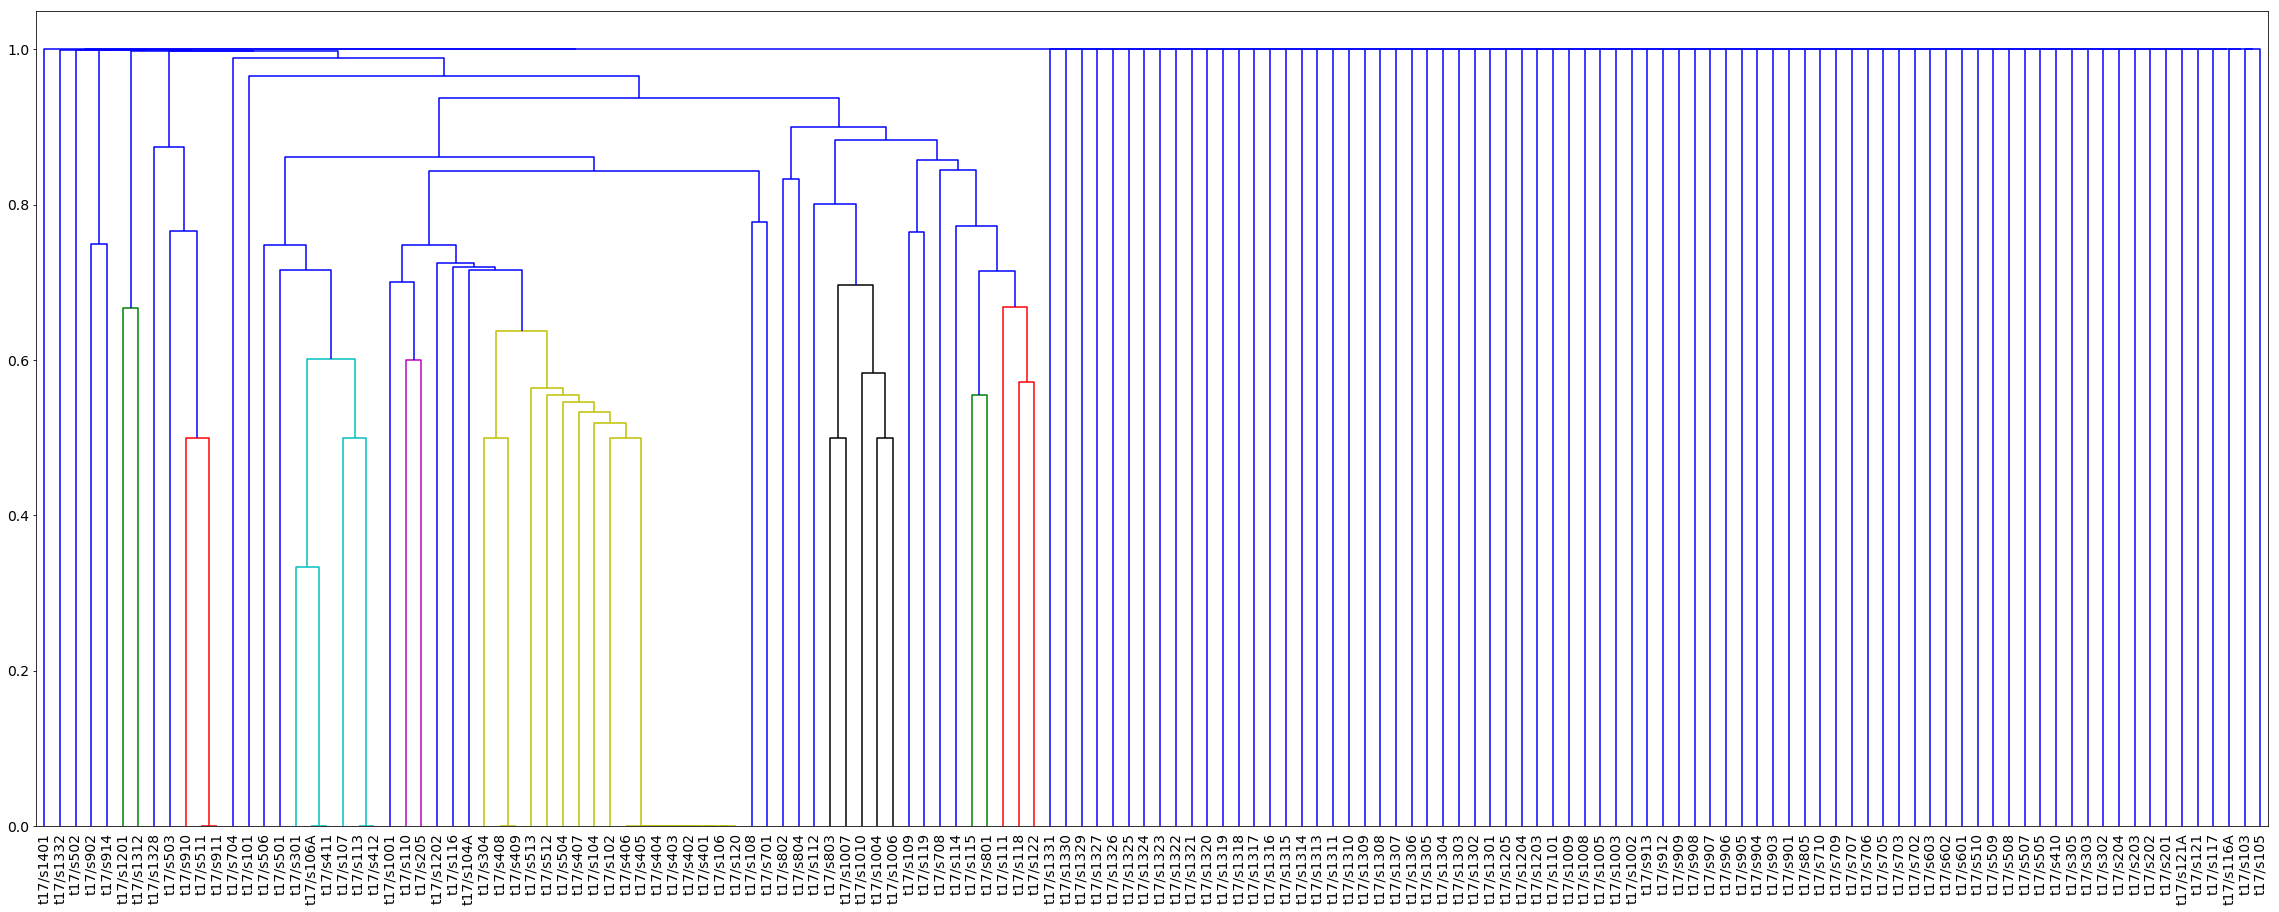

In [68]:
plot(clusterings['uw-cite'])

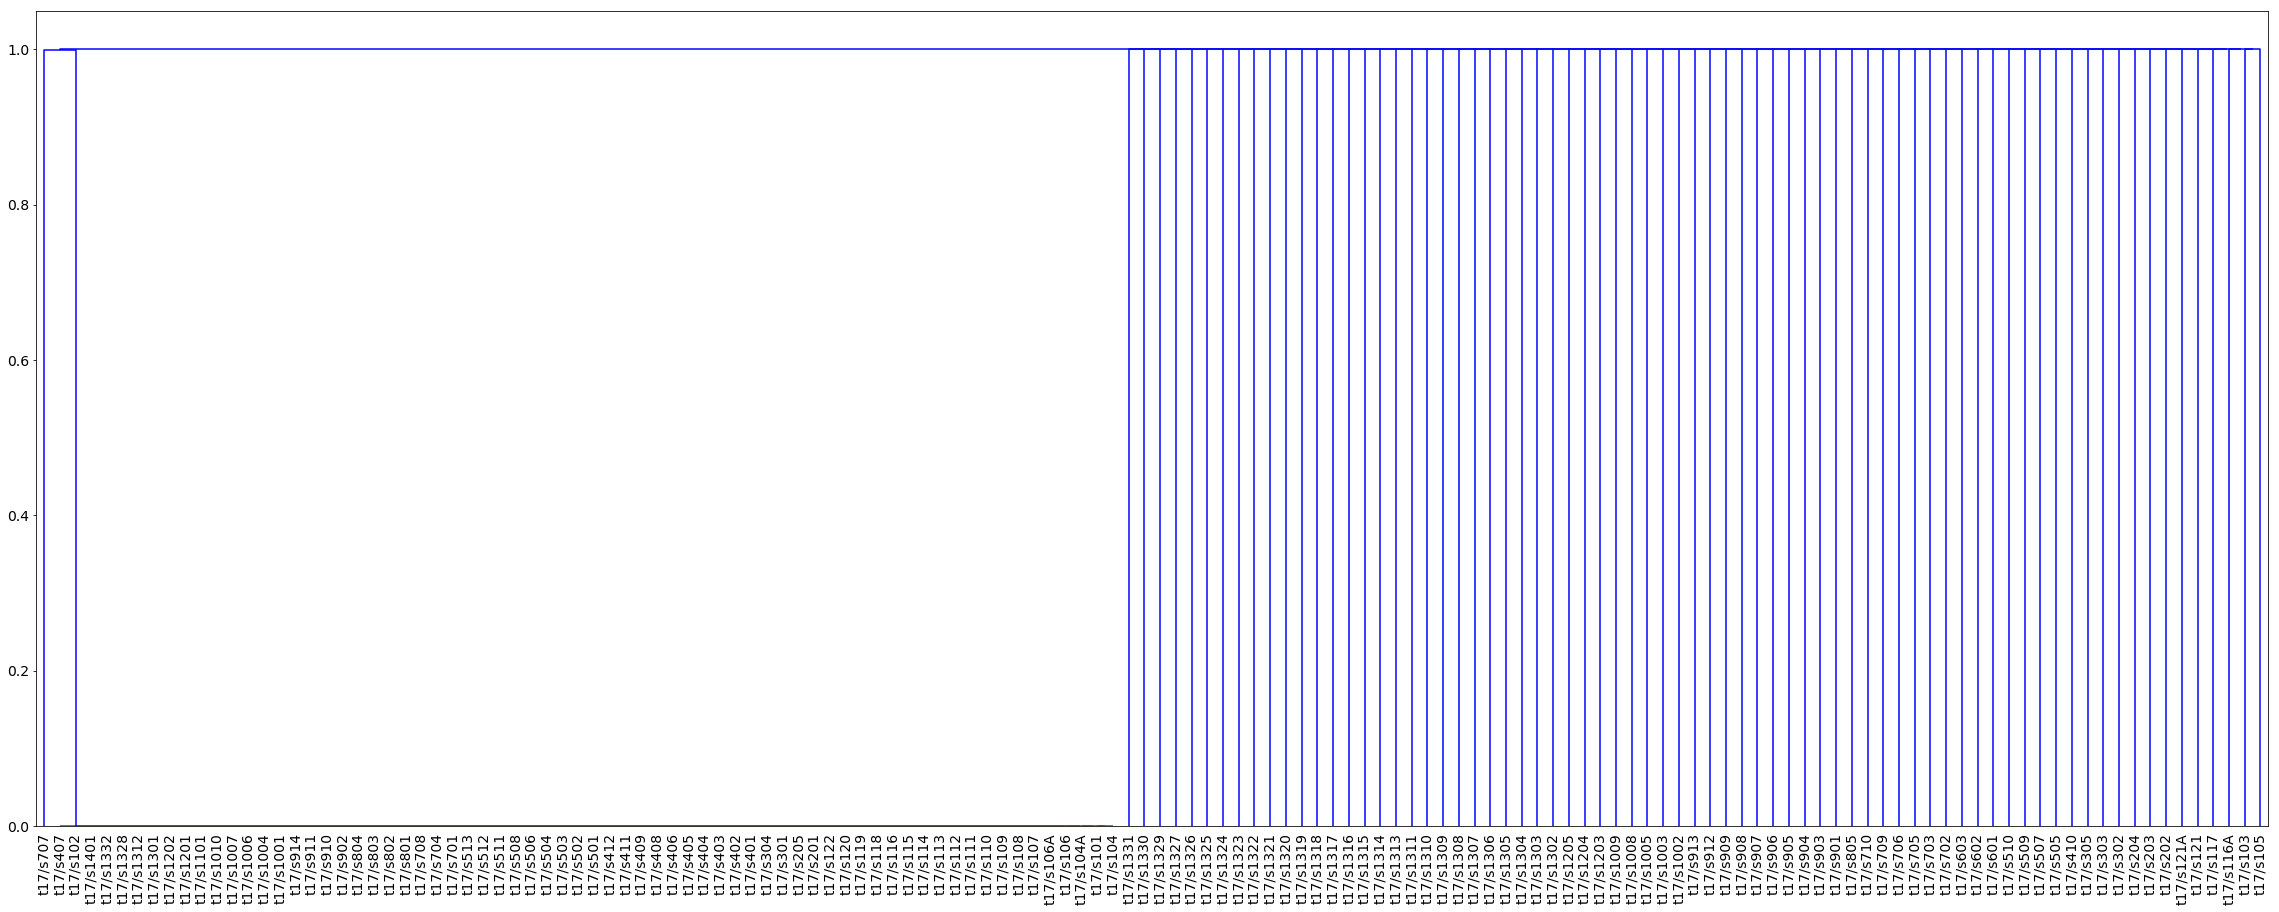

In [69]:
plot(clusterings['sink'])

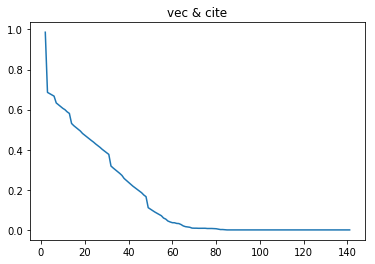

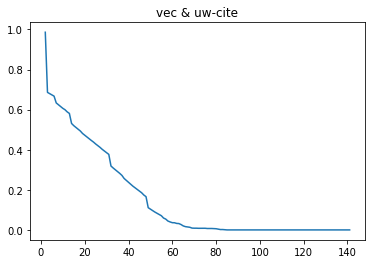

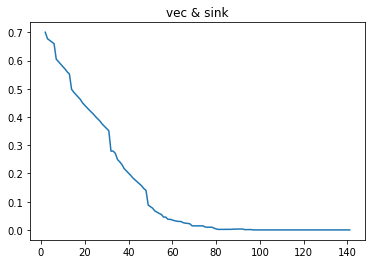

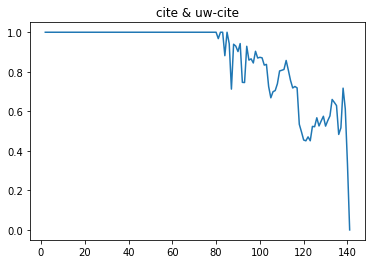

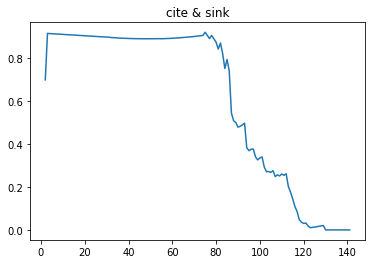

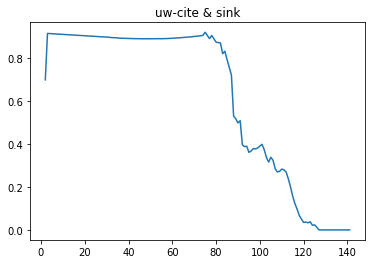

In [70]:
for a, b in itertools.combinations(clusterings.items(), 2):
    y = fm_index(a[1], b[1])
    
    plt.figure()
    plt.plot(range(2, a[1].n_samples), y)
    plt.title("{} & {}".format(a[0], b[0]))